In [94]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

# **S&P 500 stock data Data Set**
Historical stock data for all current S&P 500 companies

**Source:**
https://www.kaggle.com/datasets/camnugent/sandp500?datasetId=1908&sortBy=voteCount

In [13]:
#get dataset from file.

df = pd.read_csv('all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [14]:
#check data have null or not

df.isna()

,date,open,high,low,close,volume,Name
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
619035,False,False,False,False,False,False,False
619036,False,False,False,False,False,False,False
619037,False,False,False,False,False,False,False
619038,False,False,False,False,False,False,False


In [16]:
#get data of AAPL stock only
df_aapl = df.loc[df['Name'] == 'AAPL']
df_aapl.head()

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [17]:
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1259 to 2517
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [24]:
#change type data of date column to datetime.
df_aapl.loc[:,'date'] = pd.to_datetime(df_aapl.loc[:,'date'],format="%Y/%m/%d")
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1259 to 2517
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 78.7+ KB


/var/folders/6b/grn5vmsd7rs9lmn4336vbb3h0000gn/T/ipykernel_25675/3505223316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aapl.loc[:,'date'] = pd.to_datetime(df_aapl.loc[:,'date'],format="%Y/%m/%d")


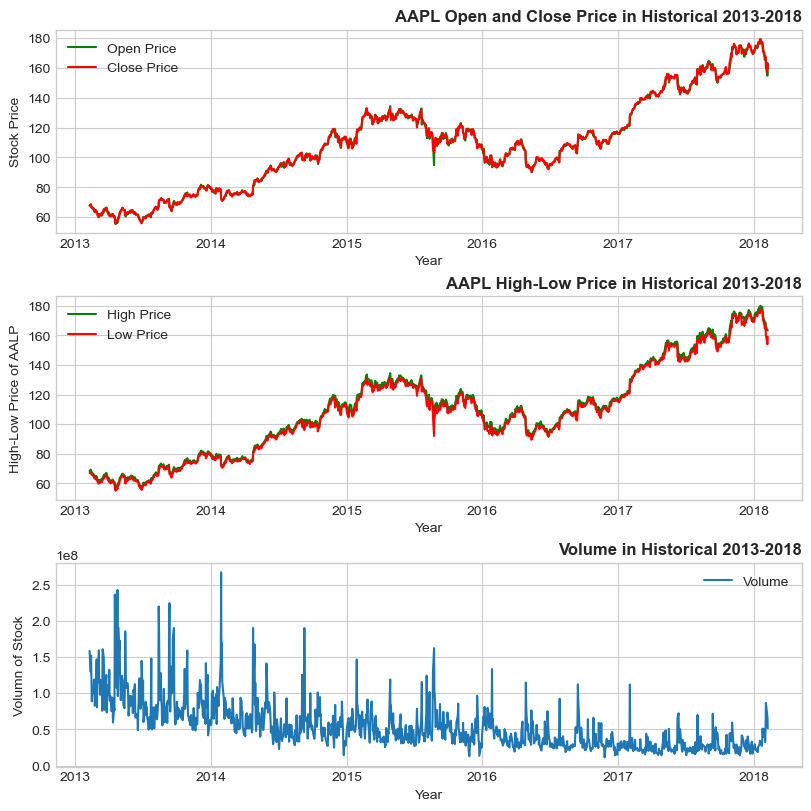

In [93]:
#AAPL Open and Close, High and Low, Volume Price in Historical(2013-1018)

fig, (ax1,ax2,ax3)= plt.subplots(3, 1, figsize=(8,8), constrained_layout = True)

ax1.plot(df_aapl["date"],df_aapl["open"],color="green", label="Open Price")
ax1.plot(df_aapl["date"], df_aapl["close"],color="red",label = "Close Price")
ax1.set_xlabel("Year")
ax1.set_ylabel("Stock Price")
ax1.legend()
ax1.set_title("AAPL Open and Close Price in Historical 2013-2018", loc = "right" , weight='bold')

ax2.plot(df_aapl["date"],df_aapl["high"],color="green", label="High Price")
ax2.plot(df_aapl["date"], df_aapl["low"],color="red",label = "Low Price")
ax2.set_xlabel("Year")
ax2.set_ylabel("High-Low Price of AALP")
ax2.legend()
ax2.set_title("AAPL High-Low Price in Historical 2013-2018",loc = "right" , weight='bold')

ax3.plot(df_aapl["date"],df_aapl["volume"], label="Volume")
ax3.set_xlabel("Year")
ax3.set_ylabel("Volumn of Stock")
ax3.legend()
ax3.set_title("Volume in Historical 2013-2018", loc = "right" , weight='bold')

plt.show()

In [96]:
#Trading Volume of AAPL in historical 2013-2018

fig = go.Figure(data=go.Ohlc(x=df_aapl['date'],open=df_aapl['open'],high=df_aapl['high'],low=df_aapl['low']
                             ,close=df_aapl['close'],increasing=dict(line=dict(color= '#58FA58'))
                             ,decreasing=dict(line=dict(color= '#FA5858'))))
fig.update_layout(
title = 'Apple Historical Price (USD$)',
yaxis_title = 'AAPL stock')

fig.show()